# <u>Feasability Study: Robot-run Cafe in Los Angeles.</u>

## Presentation Link:

https://drive.google.com/file/d/1tMI5K6jRbpHZNFw8x0aK8PpA2y6O45im/view?usp=drive_link

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Libraries & Data Loading](#lib)
* [Stage 2. Data Pre-Processing](#dp)
* [Stage 3. Restaurant Analysis](#ra)
    * [3.1. Proportions of Restaurant Types](#ra1)
    * [3.2. Proportions of Chain vs Non-chain Establishments ](#ra2)
    * [3.3. Chain Establishments Share according to their  Restaurant Types](#ra3)
    * [3.4. Characteristics of Chain Establishments | No. of Seats VS No. of Restaurants](#ra4)
    * [3.5. Average Number of Seats by Restaurant Type](#ra5)
    * [3.6. Street Density by No. of Restaurants](#ra6)
    * [3.7. Distribution of Number of Seats according to Top 10 Densely Populated Streets](#ra7)
* [Stage 4. Findings & Overall Conclusion](#conclusion)

# Introduction <a id='intro'></a>

This study aims to assess the feasability of opening a wholly robot-run cafe in the city of Los Angeles. With the nature of this business being the first of its kind, the business will garner interest at the beginning solely from a novelty standpoint. The main goal would be to determine how best to provide the business the best chance at succeeding once said novelty as worn off. At this preliminary stage, the main objectives are:
1. Cost control regarding size of the cafe (number of seats). We don't want to overdo it.
2. Chain restaurants types are successful for a reason. We want to assess the average size of said chains, and whether the size of these restaurants positively correlate with better business prospects. 
3. Location is everything. With such a novel concept, and with the nature of a cafe being one of high-turnover, we need high amounts of traffic.

# 1. Libraries & Data Loading <a id='lib'></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go 
import re

In [56]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [57]:
try:
    df = pd.read_csv('rest_data_us.csv')
except:
    df = pd.read_csv('/datasets/rest_data_us.csv')

# 2. Data Pre-processing <a id='dp'></a>

In [58]:
# Overview:

display(df.head())
df.info(memory_usage='deep')

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


In [59]:
# Checking for complete duplicates:

df[df.duplicated()]

,id,object_name,address,chain,object_type,number


In [60]:
# Finding our missing value entries based on 'chain':

df[df['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [61]:
# Assessing potential relationships of our missing data:

display(df.query("object_name.str.contains('LOS 3 CARNALES')"))
display(df[df['object_name'].str.contains("JAMMIN")])
df.query("object_name.str.contains('LEXINGTON')")

,id,object_name,address,chain,object_type,number
6624,18410,TACOS LOS 3 CARNALES,5000 WHITTIER BLVD,False,Fast Food,6
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14


,id,object_name,address,chain,object_type,number
6790,18576,WI JAMMIN CAFE,1359 S REDONDO BLVD,False,Restaurant,28
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1


,id,object_name,address,chain,object_type,number
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


**Observation:** Our missing values do not seem to be related to any of our restaurants and as such, will be replaced with FALSE in the 'chain' column.

In [62]:
# Replacing missing values in 'chain' == FALSE

df['chain'].fillna(False, inplace=True)

In [63]:
# Replacing values of TRUE/FALSE > chain/non-chain

chain_dict = {True: 'Chain', False: 'Non-Chain'}

df['chain'] = df['chain'].map(chain_dict)

In [64]:
# Converting 'chain' and 'object_type' column to category type:

df['chain'] = df['chain'].astype('category')
df['object_type'] = df['object_type'].astype('category')

In [65]:
# Renaming our columns for readability:

df.columns = ['rest_id', 'rest_name', 'address', 'chain', 'rest_type', 'seats']
df.head()

,rest_id,rest_name,address,chain,rest_type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,Non-Chain,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,Non-Chain,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,Non-Chain,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,Non-Chain,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,Non-Chain,Restaurant,20


[Back to Contents](#back)

# 3. Restaurant Analysis <a id='ra'></a>

### 3.1. Proportions of Restaurant Types <a id='ra1'></a>

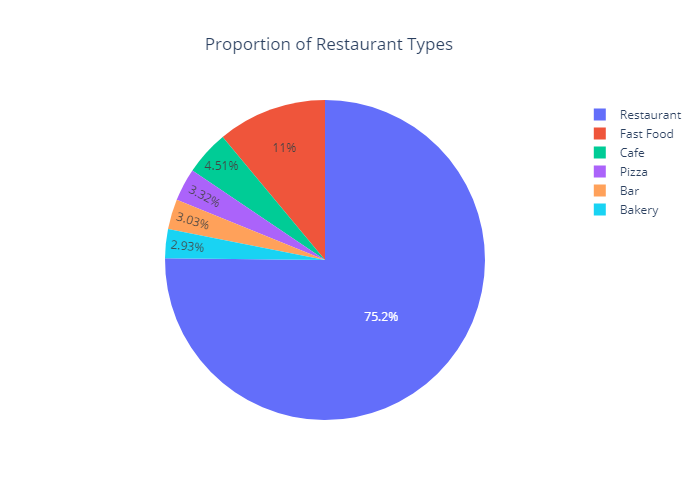

In [66]:
# Constructing a pie chart of restaurant type proportions:

share_of_types = df.groupby('rest_type', as_index=False)['rest_id'].count() #code change happens here
share_of_types.columns = ['rest_type', 'rest_count']

fig = px.pie(share_of_types, values='rest_count', names='rest_type', title='Proportion of Restaurant Types')

fig.update_layout(title_x=0.47)
fig.show("png")
#fig.write_image("plot_figures/proportions_rest_types.png", scale=3)

**Observations:** The city of Los Angeles is predominantly made up of the full-service restaurants, accounting for 75% of the overall population share, followed by fast food and cafe establishments at 11% and 4.75% respectively.

[Back to Contents](#back)

### 3.2. Proportions of Chain vs Non-chain Establishments <a id='ra2'></a>

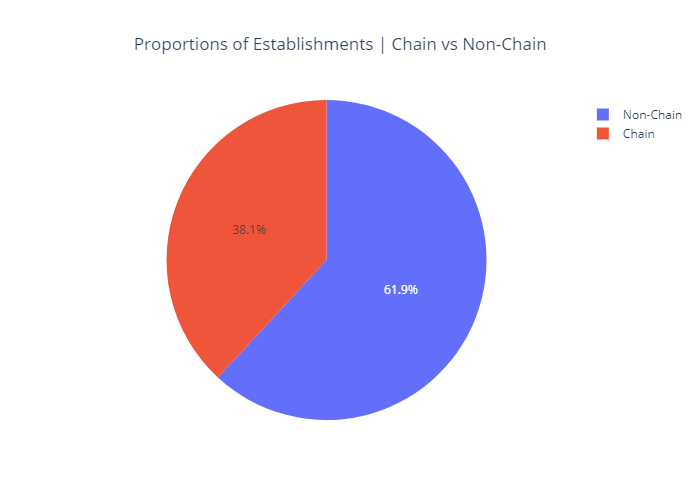

In [67]:
# Constructing a pie chart to display share of chains vs standalone restaurants:

share_of_chain = df.groupby('chain', as_index=False)['rest_id'].count()
share_of_chain.columns = ['chain', 'rest_count']

fig = px.pie(df, values='rest_id', names='chain', title='Proportions of Establishments | Chain vs Non-Chain')

fig.update_layout(title_x=0.486)
fig.show("png")
#fig.write_image("plot_figures/proportions_establishments.png", scale=3)

**Observations:** The restaurant proportions in LA are in favor of non-chain establishments compared to chain establishments, with the former accounting for roughly 62% of overall share. We will need to dive into what makes a chain restaurant successful, in that they wouldn't be a chain if it wasn't the case.

[Back to Contents](#back)

### 3.3. Chain Establishments Share according to their Restaurant Types <a id='ra3'></a>

In [68]:
# Slicing 'chain' establishments:

df_chain = df.query("chain == 'Chain'")
df_non_chain = df.query("chain == 'Non-Chain'")

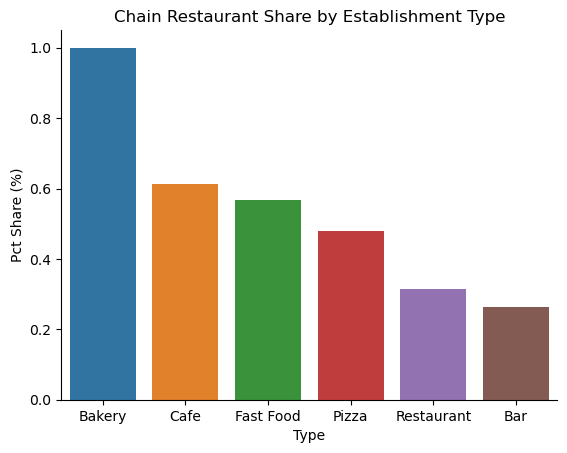

In [69]:
# Chain establishments according to their types:

grouped_chain_object = pd.pivot_table(df, values ='rest_name', index = 'rest_type', columns = ['chain'], aggfunc='count')
chain_est_series = grouped_chain_object['Chain']/(grouped_chain_object['Chain']+grouped_chain_object['Non-Chain'])
chain_est_series = chain_est_series.sort_values(ascending=False)

fig = plt.figure()
sns.barplot(x=chain_est_series.index, y=chain_est_series.values, order=chain_est_series.index)
plt.title('Chain Restaurant Share by Establishment Type')
plt.xlabel('Type')
plt.ylabel('Pct Share (%)')

sns.despine(left=False, bottom=False)
plt.show()
#fig.savefig("plot_figures/chain_restaurants_by_establishment_type", dpi=200)

**Observations:** Chain restaurants are mostly dominated by bakeries, coming in at roughly 100% share of type, followed closely by cafes and fast-food chains. In our case, more than half of cafes in LA are comprised of chains, and hence will allow us to further scrutinize the characteristics that underlie the success of chain establishments.

[Back to Contents](#back)

### 3.4. Characterisitcs of Chain Establishments | No. of Seats VS No. of Restaurants <a id='ra4'></a>

In [70]:
# Aggregating total number of restaurants and average seats by each distinct establishment brand:

chains_seats = df.groupby(['rest_name', 'chain']).agg({'rest_id': 'count', 'seats': 'mean'})
chains_seats = chains_seats.dropna()
chains_seats.reset_index(inplace=True)
chains_seats.columns=['rest_name', 'chain', 'rest_count', 'seats']
chains_seats.head()

,rest_name,chain,rest_count,seats
0,#1 CAFE,Non-Chain,1,4.0
1,#1 CHINESE FAST FOOD,Chain,1,6.0
2,#1 DONUT,Non-Chain,1,21.0
3,#1 DONUTS,Non-Chain,1,25.0
4,#2 MOON BBQ,Non-Chain,1,109.0


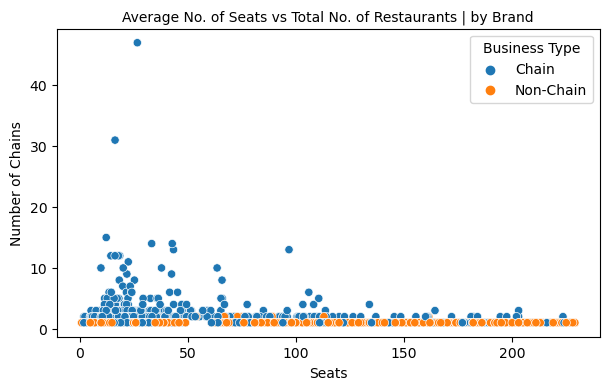

In [71]:
# Plotting the number of restaurants vs average number of seats by establishment brand:


fig, ax = plt.subplots()
ax = sns.scatterplot(data=chains_seats, x='seats', y='rest_count', hue='chain')

fig.set_figwidth(7)
fig.set_figheight(4)
ax.legend(title='Business Type')
ax.set_title('Average No. of Seats vs Total No. of Restaurants | by Brand', fontsize='10')
ax.set_xlabel('Seats')
ax.set_ylabel('Number of Chains')

plt.show()
#fig.savefig("plot_figures/no_seats_vs_no_restaurants", dpi=200)

**Observations:** Chain restaurants have a typically larger amount of establishments with fewer seats in general available for its customers. As observed, the larger the number of restaurants under a chain brand, the less seats provided. Non-chain restaurants are typically fewer in numbers, which is a given, but are many times more diverse in the number of seats available for dine-in.

[Back to Contents](#back)

### 3.5. Average Number of Seats by Restaurant Type <a id='ra5'></a>

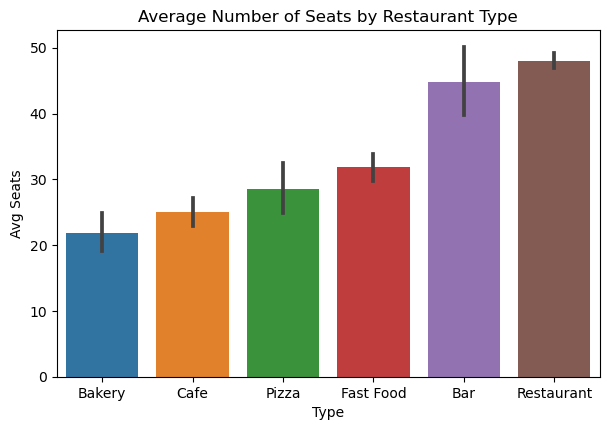

In [72]:
# Aggregating average number of seats by each distinct restaurant category:

avg_seats = df.groupby('rest_type', as_index=False)['seats'].mean().sort_values('seats', ascending=True)

fig, ax = plt.subplots()

fig.set_figwidth(7)
fig.set_figheight(4.5)

ax = sns.barplot(x='rest_type', y='seats', data=df, order=avg_seats['rest_type'])
ax.set_title('Average Number of Seats by Restaurant Type')
ax.set_xlabel('Type')
ax.set_ylabel('Avg Seats')

plt.show()
#fig.savefig("plot_figures/avg_seats_rest_type", dpi=200)

**Observations:** Restaurants and bars have on average the most number of seats provided for dine-in with close to 45 seats and above. This is typical of the nature of these establishments as their customers are those with larger groups and quite possibly longer average time spent. Turnover is slow, coupled with larger pax per table and hence, the need for more provided seats. Cafes on the other hand have a typically lower count of seats, averaging roughly 25 across all cafe establishments. This makes sense as the nature of cafes are one of less time spent per customer and hence overall quicker turnover.

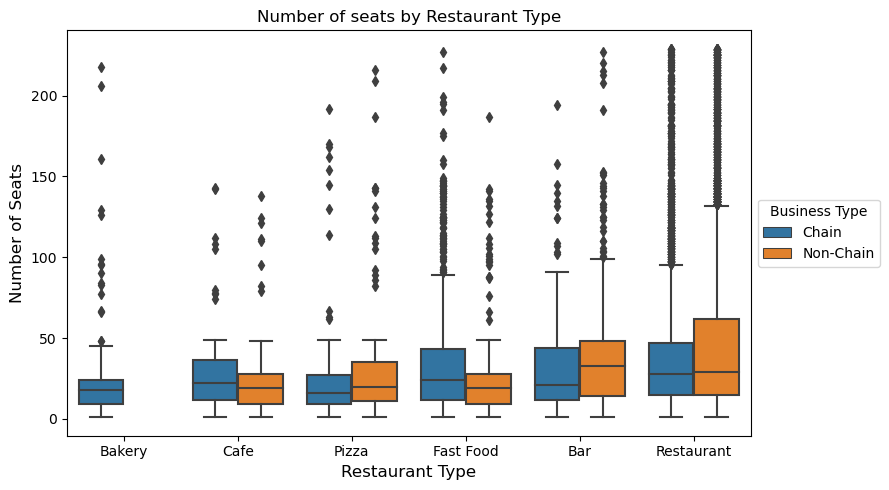

In [73]:
# Looking at overall seat number distribution per restaurant type by business type:

fig, ax = plt.subplots()

fig.set_figwidth(9)
fig.set_figheight(5)

ax = sns.boxplot(x='rest_type', y='seats', hue='chain', data=df, order=avg_seats['rest_type']) 
ax.legend(title='Business Type', loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})
ax.set_title('Number of seats by Restaurant Type')
ax.set_xlabel('Restaurant Type', fontsize=12)
ax.set_ylabel('Number of Seats', fontsize=12)

plt.tight_layout()
plt.show()
#fig.savefig("plot_figures/number_seats_rest_type", dpi=200)

**Observations:** When dissecting by business type in our analysis of number of seats by restaurant type, a few points stick out to us. 
- Restaurants share similar charateristics between chain and non-chain establishments, in that number of seats are considerably more varied throughout the overall distribution compared to our restaurant types.
- Non-chain bars have a substantially higher average seat count than its chain counterparts, with some overperforming the average quite significantly. Overall though, averages are in the lower ranges of the distribution.
- There are a select few fast food chains that profoundly overperform the average. These are representative of our prior analysis on [No. of Seats VS No. of Restaurants](#ra4) where we saw a handful of chain brands that were few in restaurant numbers but contain a large amount of seats on average.
- With regards to the restaurant type of our business (Cafe's), number of seats are consistently in the lower ranges for both chain and non-chain establishment types.

[Back to Contents](#back)

### 3.6. Street Density by No. of Restaurants<a id='ra6'></a>

In [74]:
# Extracting street names:

df['street_name'] = df['address'].str.findall('(?i)^[\d\s]*((?!apt|ste|#|unit)[^\s\d](?:(?!\s*(?:apt|ste|#|unit)).)*)')

df['street_name'] = [''.join(map(str, l)) for l in df['street_name']]
df.head(10)

,rest_id,rest_name,address,chain,rest_type,seats,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,Non-Chain,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,Non-Chain,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,Non-Chain,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,Non-Chain,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,Non-Chain,Restaurant,20,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,Non-Chain,Restaurant,14,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,Non-Chain,Restaurant,100,WORLD WAY
7,11793,PHO LALA,3500 W 6TH ST STE 226,Non-Chain,Restaurant,7,W 6TH ST
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,Chain,Fast Food,1,N SAN FERNANDO RD
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,Non-Chain,Restaurant,35,N CAHUENGA BLVD


In [75]:
# Grouping by streetname and accessing the top 10 streets based on restaurant count:

top10 = (
    df.groupby('street_name', as_index=False)['rest_id'].count()).sort_values(
    by='rest_id', ascending=False).head(10)

top10.columns = ['street_name', 'rest_count'] 
top10.reset_index(drop=True, inplace=True)

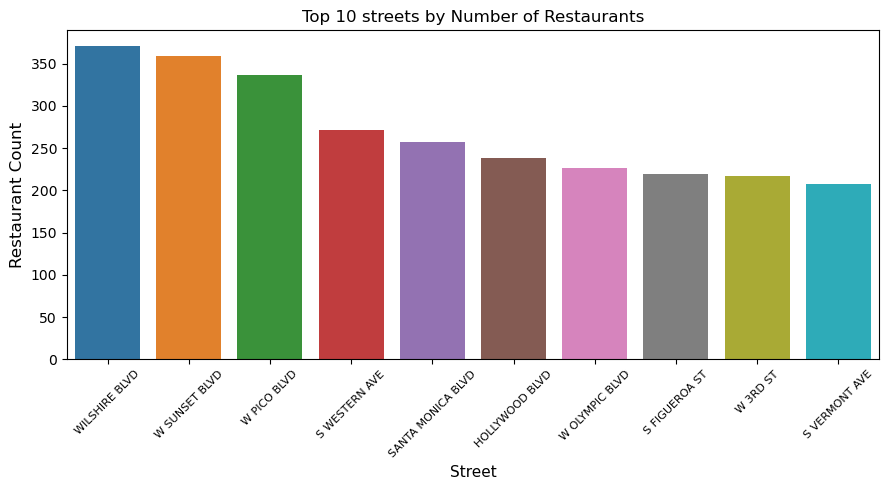

In [76]:
#Plotting a barplot:

fig, ax = plt.subplots()

fig.set_figwidth(9)
fig.set_figheight(5)

ax = sns.barplot(x='street_name', y='rest_count', data=top10)
ax.set_title('Top 10 streets by Number of Restaurants')
ax.set_xlabel('Street', fontsize=11)
ax.set_ylabel('Restaurant Count', fontsize=12)
ax.set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9],
           labels=['WILSHIRE BLVD', 'W SUNSET BLVD', 'W PICO BLVD', 'S WESTERN AVE', 'SANTA MONICA BLVD', 
                   'HOLLYWOOD BLVD', 'W OLYMPIC BLVD', 'S FIGUEROA ST', 'W 3RD ST', 'S VERMONT AVE'],
              fontsize=8,
              rotation=45)
plt.tight_layout()
plt.show()
#fig.savefig("plot_figures/top10_streets_restaurant count", dpi=200)

**Observations:** Wilshire Boulvevard, West Sunset Boulevard and West Pico Boulevard are our top 3 populated streets in terms of restaurant size, scoring well over roughly 325 restaurants. Beyond that, there is a slight appreciable drop in restaurants in 4th place's South Western Avenue at slightly above 250, and from that point onwards we see a linear and gradual decline.

In [77]:
# Sepratating our streets into groups of restaurant count:

rest_count = df.groupby('street_name', as_index=False)['rest_id'].count().sort_values('rest_id')
rest_count.columns = ['street_name', 'rest_count']

def rest_count_groups(count):
    if count <= 1:
        return '1'
    if count <= 10:
        return '10 or less'
    if count <= 50:
        return '50 or less'
    if count <= 100:
        return '100 or less'
    if count <= 200:
        return '200 or less'
    else:
        return 'Beyond 200'
            
        
rest_count['rest_count_group'] = rest_count['rest_count'].apply(rest_count_groups)

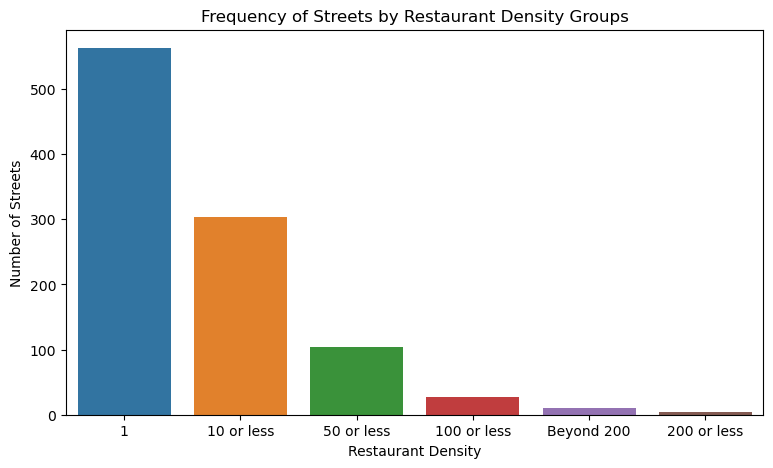

In [78]:
# Barplot on number of streets by restaurant count group:

rest_grouped = rest_count.groupby('rest_count_group', as_index=False)['street_name'].count().sort_values(
    'street_name', ascending=False) 

fig, ax = plt.subplots()

fig.set_figwidth(9)
fig.set_figheight(5)

ax = sns.barplot(x='rest_count_group', y='street_name', data=rest_grouped)
ax.set_title('Frequency of Streets by Restaurant Density Groups')
ax.set_xlabel('Restaurant Density')
ax.set_ylabel('Number of Streets')

plt.show()
#fig.savefig("plot_figures/streets_density_groups", dpi=200)

**Observations:** The majority of streets in LA contain no fewer than 10 restaurants on average, with 1 restaurant per street being the most observable number. There are far fewer streets that are densely populated with regards to the number of restaurants and eateries present. Thus, showcases the importance of picking the right locale that will garner an interest in our novel robot themed cafe.

[Back to Contents](#back)

### 3.7. Distribution of Number of Seats according to Top 10 Densely Populated Streets<a id='ra7'></a>

In [79]:
# Filtering data on top 10 streets:

popular_streets_df = df[df['street_name'].isin(top10.street_name)]
popular_streets_df

,rest_id,rest_name,address,chain,rest_type,seats,street_name
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,Non-Chain,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,Non-Chain,Restaurant,22,W SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,Chain,Restaurant,38,W SUNSET BLVD
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,Chain,Bakery,17,S WE
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,Chain,Bakery,26,W SUNSET BLVD
...,...,...,...,...,...,...,...
9634,21420,MILD SAUCE,8500 W OLYMPIC BLVD STE B,Non-Chain,Restaurant,15,W OLYMPIC BLVD
9635,21421,THE TEA & COFFEE EXCHANGE,6801 HOLLYWOOD BLVD # 120,Non-Chain,Cafe,4,HOLLYWOOD BLVD
9639,21425,MCDONALD'S,1800 S WESTERN AVE,Chain,Fast Food,135,S WE
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,Non-Chain,Restaurant,225,SANTA MONICA BLVD


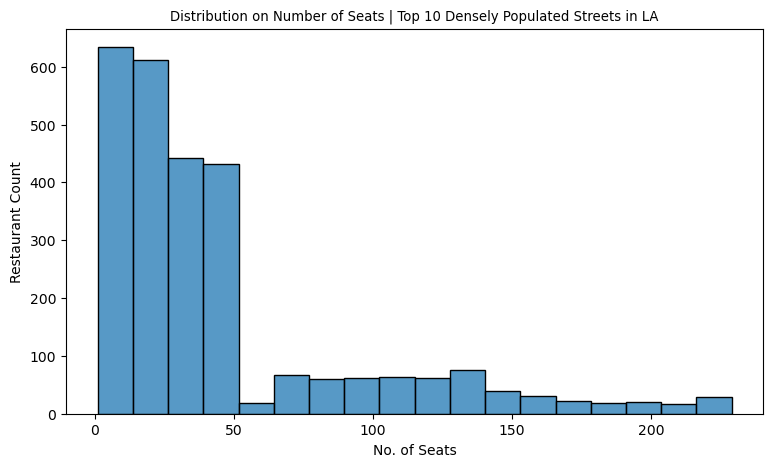

In [80]:
# Distribution plot on number of seats according to restaurants

fig, ax = plt.subplots()

fig.set_figwidth(9)
fig.set_figheight(5)

ax = sns.histplot(popular_streets_df['seats'], bins=18)
ax.set_title('Distribution on Number of Seats | Top 10 Densely Populated Streets in LA', fontsize=9.5)
ax.set_xlabel('No. of Seats')
ax.set_ylabel('Restaurant Count')

plt.show()
#fig.savefig("plot_figures/no_seats_top10_distr", dpi=200)

**Observations:** The large majority of our restaurants in LA have less than 50 seats on average, with roughly 25 or less seats being the most observed value in our distribution. What we can infer from this is that there is a large proportion of restaurants that are small in scale, whether that be bakeries, cafes or fast food chains, and that the assumption is that there is a higher likelihood of a lower pax per per customer group visiting our prospective cafe, which bodes well for our business model. Below 50 seats as the upper limit is what we should be aiming for; we don't want to overexpend, but neither do we want under-provision either.

[Back to Contents](#back)

# 4. Findings and Overall Conclusions<a id='conclusion'></a>

Harking back to our goals and objectives, we need to strike the right balance in terms of size and scale of our robot-run cafe, all the while choosing the right location for the kind of business model we are after; that is high-turnover and efficiency. These are the findings:

1. When assessing share of restaurant types in LA, one things stands out: Cafes come in at just below  5% share of the overall market. This bodes well for us, as it fits a need that is under-represented.
2. Non-chain business types share of market outweigh chain restaurants at a ratio of 6:4. Chain restaurants are successful for a reason. A roughly 40% share of market is still extremely large for a handful of chain restaurant brands and thus, would give us insights into their characteristics.
3. Chain restaurants are mostly dominated by bakeries, coming in at roughly 100% share of type, followed closely by cafes and fast-food chains. In our case, more than half of cafes in LA are comprised of chains, and hence allowed us to further scrutinize the characteristics that underlie the success of chain establishments. In other words, following their footprints.
4. Analyzing correlation between number of seats versus number of restaurants for chain-type establishments, we found a large cluster of brands with a high count of outlets and a low count of seats available for dine in. It is evident that the success of very popular chains are not dictated by a large amount of seats, but by other factors not seen at a macro level.
5. When analyzing distribution of seats by restaurant type, cafes for both chain and non-chain establishments were roughly on par at 25 or so seats on average.
6. High traffic is a key criteria for our business concept. That being said, the most popular streets in LA by density of restaurants in the area are Wilshire Boulevard, West Sunset Boulevard and West Pico Boulevard.
7. Our study on streets grouped by density of restaurants in the area highlight a couple of things; Share of streets with a singular restaurant or below a count of 10 make up the majority of our restaurant population in LA. On the opposite spectrum, there are far fewer streets with a density of 200 and above. Hence, the importance of honing in on the right location for maximum traffic.
8. With respect to our top 10 streets in terms of restaurant density, the typical restaurant on average contains roughly 50 or below seats for dine-in.

**Overall Conclusion: The ideal number of seats/size of cafe amounts to 25 seats on average, and should not cross the threshold of 50. In terms of a best case scenario, it would be wise to aim for one of Wilshire Boulevard, West Sunset Boulvard or West Pico Boulevard.**

[Back to Contents](#back)